<a href="https://colab.research.google.com/github/pablex72/time-series-kaggle-practice/blob/main/Linear_Regression_With_Time_Series2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [2]:
book_sales = pd.read_csv('/content/s2-r2-2019-2022.csv', index_col='Date',parse_dates=['Date'])

book_sales.rename( columns = { "NDVI": "Hardcover"}, inplace=True)

In [3]:
book_sales['Time'] = np.arange(len(book_sales.index))
book_sales['Lag_1'] = book_sales['Hardcover'].shift(1)
book_sales = book_sales.reindex(columns=['Hardcover', 'Time', 'Lag_1'])

dtype = {
    'store_nbr': 'category',
    'family': 'category',
    'sales': 'float32',
    'onpromotion': 'uint64',
}


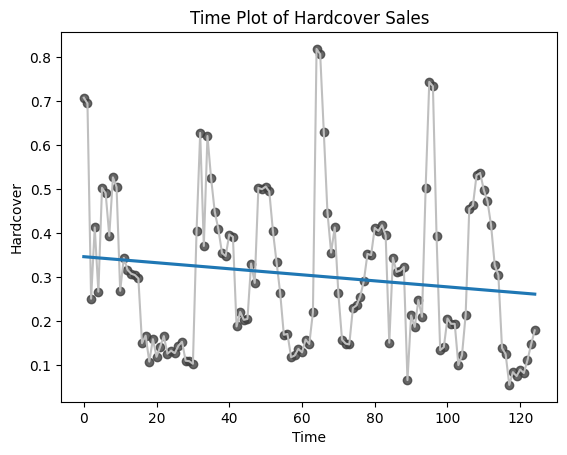

In [4]:
fig, ax = plt.subplots()
ax.plot('Time', 'Hardcover', data=book_sales, color='0.75')
ax = sns.regplot(x='Time', y='Hardcover', data=book_sales, ci=None, scatter_kws=dict(color='0.25'))
ax.set_title('Time Plot of Hardcover Sales');

Interpret linear regression with the time dummy¶
The linear regression line has an equation of (approximately) Hardcover = 3.33 * Time + 150.5. Over 6 days how much on average would you expect hardcover sales to change? After you've thought about it, run the next cell.

Interpreting the regression coefficients can help us recognize serial dependence in a time plot. Consider the model target = weight * lag_1 + error, where error is random noise and weight is a number between -1 and 1. The weight in this case tells you how likely the next time step will have the same sign as the previous time step: a weight close to 1 means target will likely have the same sign as the previous step, while a weight close to -1 means target will likely have the opposite sign.

# 2) Interpret linear regression with a lag feature¶
Run the following cell to see two series generated according to the model just described.

# 3) Fit a time-step feature¶ new sect
Complete the code below to create a linear regression model with a time-step feature on the series of average product sales. The target is in a column called 'sales'.

In [37]:
store_sales = pd.read_csv(
    '/content/s2-r2-2019-2022-correct.csv',
    dtype=dtype,
    parse_dates=['Date'],
    infer_datetime_format=True,
)
store_sales

,Date,NDVI
0,2019-01-26,0.708
1,2019-02-05,0.695
2,2019-03-07,0.251
3,2019-04-06,0.413
4,2019-04-26,0.267
...,...,...
120,2022-10-02,0.090
121,2022-10-17,0.082
122,2022-11-06,0.111
123,2022-11-16,0.147


In [38]:
store_sales = store_sales.set_index('Date').to_period('D')
average_sales = store_sales
average_sales

,NDVI
Date,
2019-01-26,0.708
2019-02-05,0.695
2019-03-07,0.251
2019-04-06,0.413
2019-04-26,0.267
...,...
2022-10-02,0.090
2022-10-17,0.082
2022-11-06,0.111


# 3) Fit a time-step feature
Complete the code below to create a linear regression model with a time-step feature on the series of average product sales. The target is in a column called 'sales'.

In [39]:
from sklearn.linear_model import LinearRegression

df = average_sales
df

,NDVI
Date,
2019-01-26,0.708
2019-02-05,0.695
2019-03-07,0.251
2019-04-06,0.413
2019-04-26,0.267
...,...
2022-10-02,0.090
2022-10-17,0.082
2022-11-06,0.111


In [40]:


time = np.arange(len(df.index))  # time dummy

df['time'] = time

X = df.loc[:, ['time']]  # features
y = df.loc[:, 'NDVI']  # target

model = LinearRegression()
model.fit(X, y)

y_pred = pd.Series(model.predict(X), index=X.index)


In [41]:
plot_params = {
    'color': 'blue',       # Line color
    'linestyle': '-',      # Line style (solid line)
    'marker': 'o',         # Marker style
    'label': 'Sales',      # Label for the legend
    # Add any other desired parameters
}

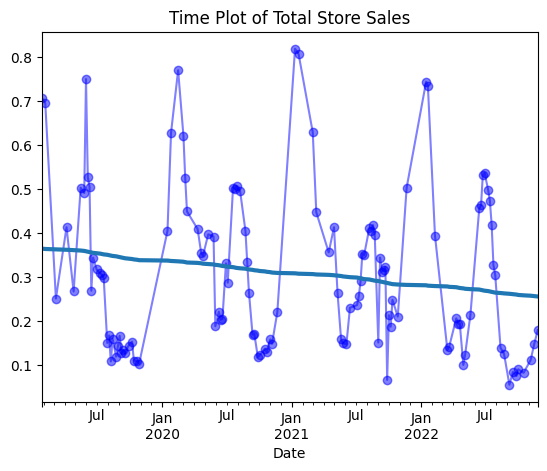

In [42]:
ax = y.plot(**plot_params, alpha=0.5)
ax = y_pred.plot(ax=ax, linewidth=3)
ax.set_title('Time Plot of Total Store Sales');

# 4) Fit a lag feature to Store Sales
Complete the code below to create a linear regression model with a lag feature on the series of average product sales. The target is in a column of df called 'sales'.

In [43]:


lag_1 = df['NDVI'].shift(1)

df['lag_1'] = lag_1

X = df.loc[:, ['lag_1']]
X.dropna(inplace=True)  # drop missing values in the feature set
y = df.loc[:, 'NDVI']  # create the target
y, X = y.align(X, join='inner')  # drop corresponding values in target

model = LinearRegression()
model.fit(X, y)

y_pred = pd.Series(model.predict(X), index=X.index)


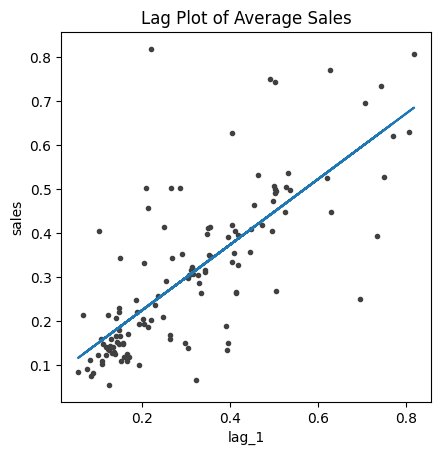

In [44]:
fig, ax = plt.subplots()
ax.plot(X['lag_1'], y, '.', color='0.25')
ax.plot(X['lag_1'], y_pred)
ax.set(aspect='equal', ylabel='sales', xlabel='lag_1', title='Lag Plot of Average Sales');